In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import xarray as xr
import matplotlib.colors as mcolors
import cmocean as cmo
cmap = cmo.cm.balance

dst = xr.open_dataset("population_dataset_time.nc")

N = len(dst.kappa)
NT = len(dst.t)
print(N)
print(NT)

hr2s = 1/3600
wm = 0.5 * hr2s
wd = 0.05 * hr2s
n2 = 1e-5
Ld = 0.006 * hr2s
Lm  = 0.004 * hr2s
growth_m = 0.05 * hr2s
growth_d = 0.008 * hr2s
# import cmocean as 




15
300
10.0


10.0


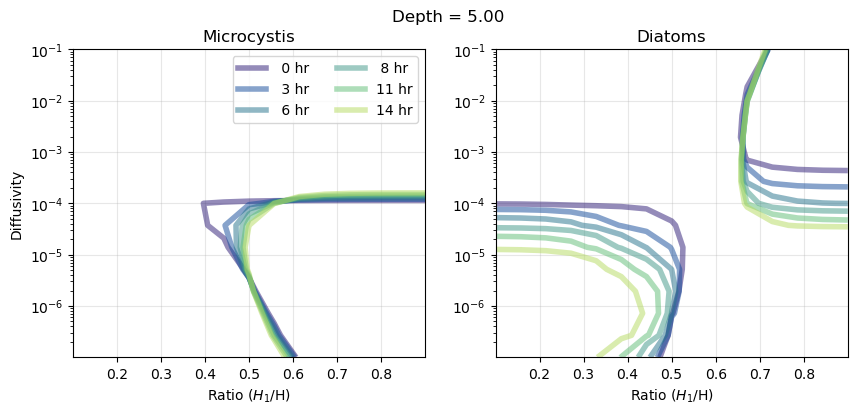

In [36]:

init_biomass = dst.m1.values[0, 0 ,0,0] + dst.m2.values[0, 0 ,0,0]
print(init_biomass)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].set_yscale('log')
axs[1].set_yscale('log')

# norm 
norm = mcolors.TwoSlopeNorm(vmin=-0.25, vcenter=0, vmax=0.25)


def normalize_color2(value):
    c = (value - init_biomass) / init_biomass
    # c = c.clip(-3, 3)
    return c


def reshape_(data, N):
    return np.array(data).reshape(N, -1)


id = 2
ir = 2
ik = 13
depth = dst.depth.values[id]
fig.suptitle("Depth = %2.2f" % depth)

KAPPA  = dst.kappa.values
RATIO = dst.ratio.values 


NT = 60 
for it in range(1, NT, 10):

    color = cmo.cm.haline(it/NT)
    BIOMASS_M = dst.m1.values[it, id, :, :] + dst.m2.values[it, id, :, :]
    BIOMASS_D = dst.d1.values[it, id, :, :] + dst.d2.values[it, id, :, :]
    # h = axs[0].pcolormesh(RATIO, KAPPA, 
    #             normalize_color2(reshape_(BIOMASS_M, N)),
    #             cmap=cmap, shading='auto', norm =norm)
    axs[0].contour(RATIO, KAPPA,
                normalize_color2(reshape_(BIOMASS_M, N)), levels=[0], linewidths=4, alpha=0.5, colors=color) 


    # h = axs[1].pcolormesh(RATIO, KAPPA, 
    #             normalize_color2(reshape_(BIOMASS_D, N)),
    #             cmap=cmap, shading='auto', norm =norm)
    axs[1].contour(RATIO, KAPPA,
                normalize_color2(reshape_(BIOMASS_D, N)), levels=[0], linewidths=4, alpha=0.5, colors=color) 
    axs[0].plot([], [], color=color, label="%2.0f hr" % (dst.t.values[it]/3600), linewidth=4, alpha=0.5)

axs[0].set_xlabel("Ratio ($H_1$/H)")
axs[1].set_xlabel("Ratio ($H_1$/H)")
axs[0].set_ylabel("Diffusivity")
axs[0].legend(ncols=2)
axs[0].set_title("Microcystis")
axs[1].set_title("Diatoms")
for ax in axs:
    ax.grid(alpha=0.3)

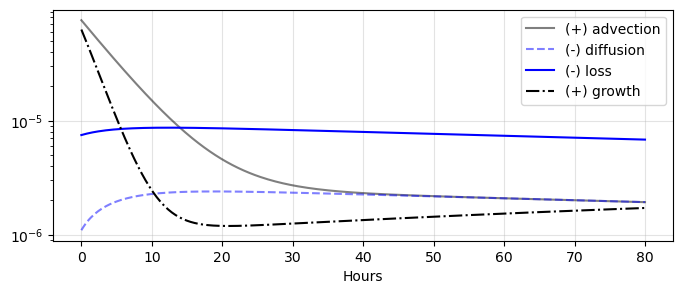

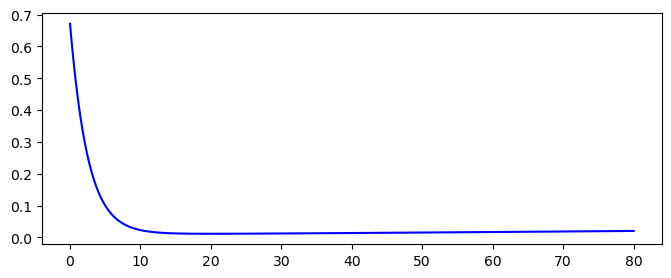

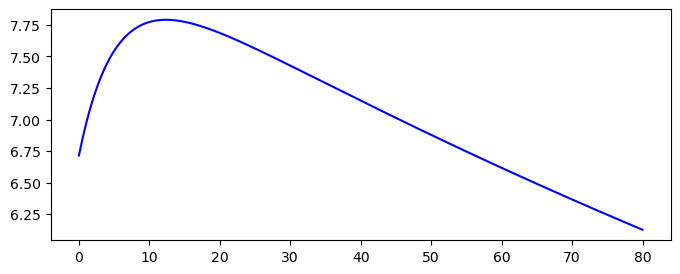

In [34]:
fig = plt.figure(figsize=(8,3))
id = 10
ir = 2
ik = 13

colors = ["#164F73", "#75A653", "#F2BC79", "#D9665B"]

times = dst.t.values/3600
axp = plt.gca()

depth = dst.depth.values[id]

ir = 5 
ratio = dst.ratio.values[ir*2]
h1 = depth*ratio
h2 = depth - h1
for ik in range(11, 12):
    kappa = dst.kappa.values[ik]
    advection = dst.m2.values[:, id ,ir*2,ik]*wm/h1 
    diffusion = kappa/h1*(dst.m2.values[:, id ,ir*2,ik] - dst.m1.values[:, id ,ir*2,ik])
    growth = growth_m * dst.m1.values[:, id ,ir*2,ik] *  dst.n1.values[:, id ,ir*2,ik] 
    loss = Lm * dst.m1.values[:, id ,ir*2,ik]
    axp.plot(times, advection, '-k', alpha=0.5, label="(+) advection")
    axp.plot(times, -diffusion, '--b', label="(-) diffusion", alpha=0.5)
    axp.plot(times, loss, '-b', label="(-) loss")
    axp.plot(times, growth, '-.k', label="(+) growth")
    gl = growth - loss

axp.set_yscale("log")
axp.set_xlabel("Hours")
axp.grid( alpha=0.35)
axp.legend()

fig2 = plt.figure(figsize=(8,3))
plt.plot(times, dst.n1.values[:, id ,ir*2,ik], '-b', label="m1")

fig2 = plt.figure(figsize=(8,3))
plt.plot(times, dst.m1.values[:, id ,ir*2,ik], '-b', label="m1")


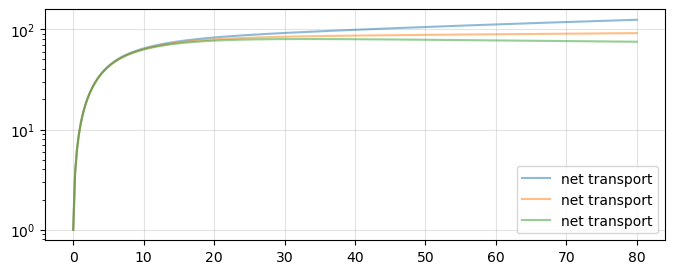

In [77]:


fig = plt.figure(figsize=(8,3))
id = 1 
ir = 2
ik = 13

colors = ["#164F73", "#75A653", "#F2BC79", "#D9665B"]

axp = plt.gca()

depth = dst.depth.values[id]
for ir in range(0,1):
    ratio = dst.ratio.values[ir*2]
    h1 = depth*ratio
    h2 = depth - h1
    for ik in range(11, 14):
        kappa = dst.kappa.values[ik]

        axp.plot(dst.t.values/3600, dst.m1.values[:, id ,ir*2,ik], '-', alpha=0.5, label="net transport")
        # axp.plot(dst.t.values/3600, -diffusion, '--', label="diffusion", alpha=0.5)

        # gradient = np.gradient(dst.m1.values[:, id ,ir*2,ik], dst.t.values)
        # index = np.where(gradient < 0)[0][0]
        # print("@ kappa = %2.2e" % dst.kappa.values[ik])
        # print("starts dying at t= %2.2f" % (dst.t.values[index]/3600))
        # axp.plot(dst.kappa.values[ik], dst.t.values[index]/3600, 'o', color=colors[ir])
# print(gradient)
axp.set_yscale("log")
# axp.set_ylabel("Hours")
# axp.set_xlabel("Kappa (m/s)")
axp.grid( alpha=0.35)
# axp.set_xlim(0, 40)
axp.legend()

In [ ]:

    


def steady_state(H, R, kappa, d2, m2, n1):

    # Solution 1:
    d1 = -d2*kappa/(-H*Ld*R + H*R*growth_d*n1 - kappa - wd)
    m1 = (-kappa*m2 - m2*wm)/(-H*Lm*R + H*R*growth_m*n1 - kappa)

    return (d1, m1)


def field_at_point(R, H, kappa, m1, m2, d1, d2, n1):
    h1 = R*H 
    h2 = H - h1     
         
    #       advection        diffusion       loss      growth
    f1 =  (wm/h1)*m2  + kappa/h1 * (m2 - m1) - Lm*m1 + growth_m*n1*m1    # surface Microcystis
    f2 = (-wm/h2)*m2  + kappa/h2 * (m1 - m2) - Lm*m2                     # bottom Microcystis
    f3 = (-wd/h1)*d1    + kappa/h1 * (d2 - d1) - Ld*d1 + growth_d*n1*d1      # surface diatoms
    f4 = ( wd/h2)*d1    + kappa/h2 * (d1 - d2) - Ld*d2                       # bottom diatoms 
    f5 = kappa/h1 * (n2 - n1) - (m1*growth_m)*n1  - (d1*growth_d)*n1 

    return f1, f2, f3, f4, f5



def first_deriv(h1, m2, kappa, n1):
    dm1 = ((wm/h1)*m2  + kappa/h1 * (m2)  )/(kappa/h1 + Lm - growth_m*n1)    # surface Microcystis
    print(dm1)


In [8]:
id = 3
ik = 12
ir = 2

depth = dst.depth.values[id]
ratio = dst.ratio.values[ir]
kappa = dst.kappa.values[ik]

m1 = dst.m1.values[:, id ,ir,ik]
d1 = dst.d1.values[:, id ,ir,ik]
d2 = dst.d2.values[:, id ,ir,ik]
m2 = dst.m2.values[:, id ,ir,ik]
n1 = dst.n1.values[:, id ,ir,ik]
txt = "Depth = %2.2f m, R = %2.1f, Kappa = %1.0e" % (depth, ratio, kappa)

m1_eq, d1_eq = steady_state(depth, ratio, kappa, d2, m2, n1)
print("depth = %2.2f, ratio = %2.2f, kappa = %1.0e" % (depth, ratio, kappa))

depth = 5.50, ratio = 0.21, kappa = 7e-07


[0.267004 0.004874 0.329415 1.      ]
[0.28291  0.105393 0.426902 1.      ]
[0.275191 0.194905 0.496005 1.      ]
[0.248629 0.278775 0.534556 1.      ]
[0.212395 0.359683 0.55171  1.      ]
[0.180629 0.429975 0.557282 1.      ]
[0.153364 0.497    0.557724 1.      ]
[0.127568 0.566949 0.550556 1.      ]
[0.122312 0.633153 0.530398 1.      ]
[0.175707 0.6979   0.491033 1.      ]
[0.288921 0.758394 0.428426 1.      ]
[0.449368 0.813768 0.335384 1.      ]
[0.626579 0.854645 0.223353 1.      ]
[0.814576 0.883393 0.110347 1.      ]


(0.0, 0.02)

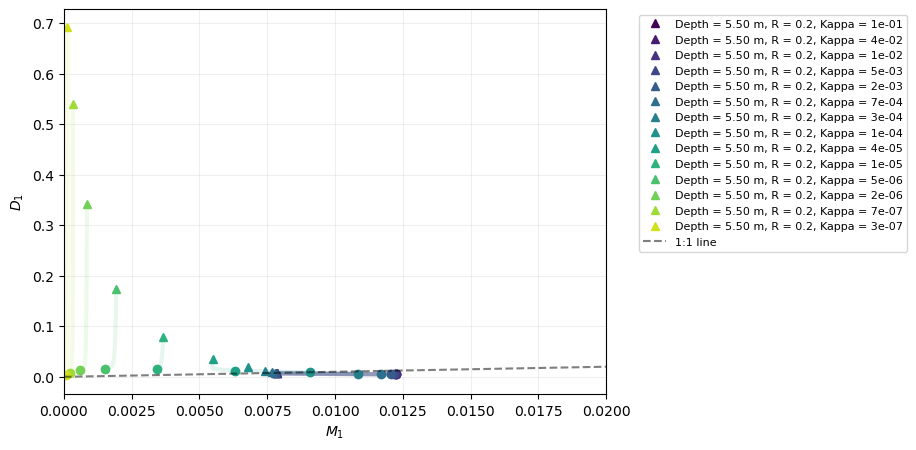

In [11]:
fig = plt.figure(figsize=(7,5))
ax = plt.gca() 

colors = plt.cm.viridis(np.linspace(0,1,15))

for i in range(0, 14, 1):
    ik = i 
    print(colors[i])
    depth = dst.depth.values[id]
    ratio = dst.ratio.values[ir]
    kappa = dst.kappa.values[ik]

    m1 = dst.m1.values[:, id ,ir,ik]
    d1 = dst.d1.values[:, id ,ir,ik]
    d2 = dst.d2.values[:, id ,ir,ik]
    m2 = dst.m2.values[:, id ,ir,ik]
    n1 = dst.n1.values[:, id ,ir,ik]
    txt = "Depth = %2.2f m, R = %2.1f, Kappa = %1.0e" % (depth, ratio, kappa)

    m1_eq, d1_eq = steady_state(depth, ratio, kappa, d2, m2, n1)
    # h= ax.scatter(m1_eq, d1_eq, c=colors[i], label=txt) 
    h= ax.plot(m1_eq, d1_eq, linewidth=3, alpha=0.12, color=colors[i])
    h= ax.plot(m1_eq[0], d1_eq[0], '^', color=colors[i], label=txt)  # c=colors[i], label=txt) 
    ax.plot(m1_eq[-1], d1_eq[-1], 'o', color=colors[i]) # c=colors[i], label=txt) 


ax.plot([0, 0.2],[0, 0.2] ,'k--', alpha=0.5, label="1:1 line")
ax.set_xlabel("$M_1$")
ax.set_ylabel("$D_1$")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax.grid(alpha=0.2)
ax.set_xlim(0, 0.02)
# ax.set_yscale('log')
# ax.set_xscale('log')

In [10]:
NN = 3

MM = largest_val
x = np.linspace(0, MM, NN)
y = np.linspace(0, MM, NN)
X, Y = np.meshgrid(x, y)


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 4), sharey=False, sharex=False)
txt = "Depth = %2.2f m, R = %2.1f, Kappa = %1.0e" % (depth, ratio, kappa)
fig.suptitle("Depth = %2.2f m, R = %2.1f, Kappa = %1.0e" % (depth, ratio, kappa))
axs = axs.flatten()

gs = axs[1].get_gridspec()

axs[0].remove()
axs[1].remove()
axs[2].remove()

axs[3].remove()
axs[4].remove()
axs[5].remove()

axphase = fig.add_subplot(gs[0:, 0])
axp = fig.add_subplot(gs[1:3])
axn = fig.add_subplot(gs[4:6])
axn.plot(dst.t.values/3600, dst.n1.values[:, id ,ir,ik], color='#BF0F0F', linewidth=3)
biomass_m = dst.m1.values[:, id ,ir,ik] + dst.m2.values[:, id ,ir,ik]
biomass_d = dst.d1.values[:, id ,ir,ik] + dst.d2.values[:, id ,ir,ik]
axp.plot(dst.t.values/3600, dst.m1.values[:, id ,ir,ik], label=r"Microcystis", color='#0F9BF2', linewidth=3)
axp.plot(dst.t.values/3600, dst.d1.values[:, id ,ir,ik], label=r"Diatoms", color='#5CA612', linewidth=3)
axp.plot(dst.t.values/3600, dst.m2.values[:, id ,ir,ik], '--', label=r"Bottom Microcystis", color='#0F9BF2', linewidth=1)
axp.plot(dst.t.values/3600, dst.d2.values[:, id ,ir,ik], '--',  label=r"Bottom Diatoms", color='#5CA612', linewidth=1)


axphase.plot(dst.m1.values[0, id ,ir,ik], dst.d1.values[0, id ,ir,ik], '^', color='k', alpha=0.3, linewidth=4)

axphase.grid(alpha=0.2)
axn.grid(alpha=0.2)
axp.grid(alpha=0.2)


axn.set_ylabel("Surface nutrients")
axp.set_ylabel("Biomass")
axp.set_xlabel("Time (hours)")

axn.set_xlabel("Time (hours)")
axn.set_xlim(0, dst.t.values[-1]/3600)
axp.set_xlim(0, dst.t.values[-1]/3600)
axp.legend(loc='upper right')

axn.hlines(1e-5, 0, dst.t.values[-1]/3600, colors='#BF0F0F', linestyles='dashed', alpha=0.5)


distances = [] 
for it in range(0, 300, 8):
    
    d1 = dst.d1.values[it, id ,ir,ik]
    d2 = dst.d2.values[it, id ,ir,ik] # (time, depth, ratio, kappa) 
    m1 = dst.m1.values[it, id ,ir,ik]
    m2 = dst.m2.values[it, id ,ir,ik]
    n1 = dst.n1.values[it, id ,ir,ik]

    U, V = np.zeros_like(X), np.zeros_like(Y)
    # Compute derivatives on grid
    for i in range(NN):
        for j in range(NN):
                f1, f2, f3, f4, f5 = field_at_point(ratio, depth, kappa, X[i,j], m2, Y[i,j], d2, n1)
                U[i,j] = f1
                V[i,j] = f3

    axp.plot(dst.t.values[it]/3600, dst.m1.values[it, id ,ir,ik] , 'o', color='#0F9BF2')
    axp.plot(dst.t.values[it]/3600, dst.d1.values[it, id ,ir,ik] , 'o', color='#5CA612')
    axn.plot(dst.t.values[it]/3600, dst.n1.values[it, id ,ir,ik] , 'o', color='#BF0F0F')

    axphase.plot([0, MM], [0, MM], '--', color='black', alpha=0.15)
    axphase.set_xlabel(r"$M_1$")
    axphase.set_ylabel(r"$D_1$")
    axphase.plot(dst.m1.values[0:it, id ,ir,ik], dst.d1.values[0:it, id ,ir,ik], '-', color='#5CA612', alpha=0.3, linewidth=4)
    axphase.plot(m1, d1, 'o', color='#5CA612', markersize=10)
    axphase.streamplot(x, y, U, V,  color="gray")
    d11, m11 = steady_state(depth, ratio, kappa, d2, m2, n1)
    axphase.plot(m11, d11, 'X', color="#A61281", markersize=10)
    distance = np.sqrt((m11 - m1)**2 + (d11 - d1)**2)
    distances.append(m11)
    plt.tight_layout()
    # plt.show()
    # assert(False)
    fig.savefig("gif/t_%03d.png" % it, dpi=150)

    axphase.cla()
    for art in list(axphase.lines[1:]):
        art.remove()
    for art in list(axn.lines[1:]):
        art.remove()
    for art in list(axp.lines[4:]):
        art.remove()
plt.close()


NameError: name 'largest_val' is not defined

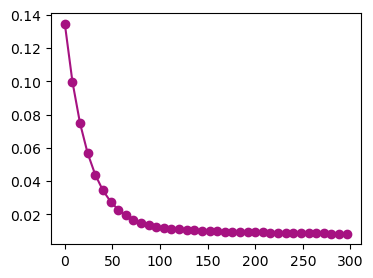

In [ ]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
ax.plot(range(0, 300, 8), distances, '-o', color='#A61281')

In [ ]:
import imageio
import os

folder  = "gif/"
images = []
for file_name in sorted(os.listdir(folder)):
    if file_name.endswith('.png'):
        file_path = os.path.join(folder, file_name)
        images.append(imageio.imread(file_path))
imageio.mimwrite('time_evolution_%s.gif' % txt, images, fps=3)
print(txt)

/tmp/ipykernel_1424657/1301611190.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


Depth = 5.00 m, R = 0.4, Kappa = 3e-04
